/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site

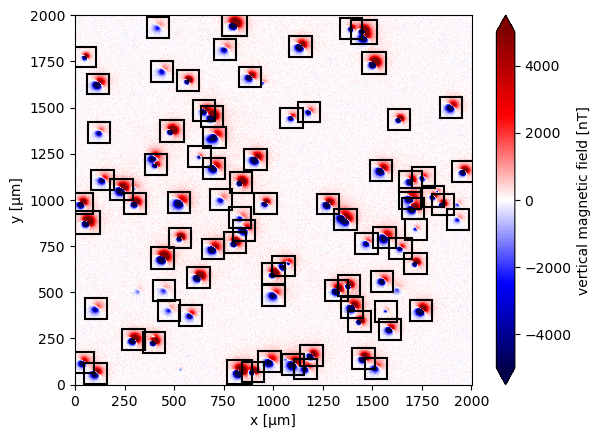

In [ ]:
import numpy as np
import verde as vd
import magali as mg
import harmonica as hm
import skimage.exposure
import xarray as xr
import matplotlib.pyplot as plt
from magali._utils import total_gradient_amplitude_grid

SEED = 5
rng = np.random.default_rng(SEED)

sensor_sample_distance = 5.0  # µm
region = [0, 2000, 0, 2000]  # µm
spacing = 2  # µm

true_inclination = 30  # degrees
true_declination = 40  # degrees
true_dispersion_angle = 5  # degrees
size = 100  # number of random dipoles

directions_inclination, directions_declination = mg.random_directions(
    true_inclination,
    true_declination,
    true_dispersion_angle,
    size=size,
    random_state= SEED,
)

dipoles_amplitude = abs(rng.normal(0, 100, size)) * 1.0e-14

dipole_coordinates = (
    rng.integers(30, 1970, size), # x
    rng.integers(30, 1970, size), # y
    rng.integers(-20, -1, size), # z
)

dipole_moments = hm.magnetic_angles_to_vec(
    inclination=directions_inclination,
    declination=directions_declination,
    intensity=dipoles_amplitude,
)

data = mg.dipole_bz_grid(
    region, spacing, sensor_sample_distance,
    dipole_coordinates, dipole_moments
)

noise_std_dev = 100  # nT
noise = rng.normal(loc=0, scale=noise_std_dev, size=data.shape)
data.values += noise

height_difference = 5 #µm

data_up = (
    hm.upward_continuation(data, height_difference)
    .assign_attrs(data.attrs)
    .assign_coords(x=data.x, y=data.y)
    .assign_coords(z=data.z + height_difference)
)

data_tga = total_gradient_amplitude_grid(data_up)
stretched = skimage.exposure.rescale_intensity(
    data_tga,
    in_range=tuple(np.percentile(data_tga, (1, 99))),
)
data_tga_stretched = xr.DataArray(stretched, coords=data_tga.coords)

windows = mg.detect_anomalies(
    data_tga_stretched,
    size_range = [20, 30], #µm
    detection_threshold = 0.05,
    border_exclusion= 2,
)

fig, ax = plt.subplots()
data.plot.pcolormesh(ax=ax, cmap="seismic", vmin=-5000, vmax=5000)
mg.plot_bounding_boxes(windows, ax=ax, color="black", linewidth=1.5)
plt.show()


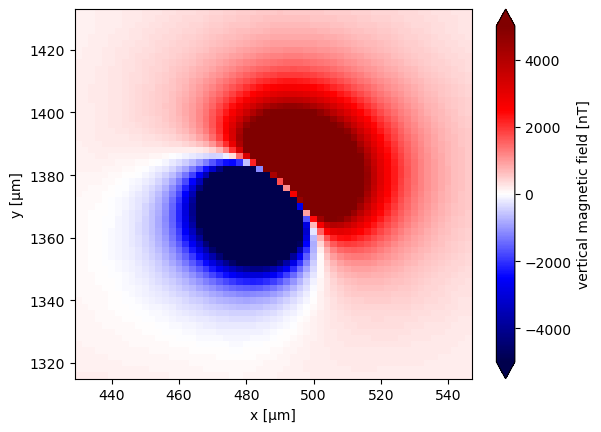

In [ ]:
fig, ax = plt.subplots()
anomaly = data_up.sel(x=slice(*windows[0][:2]), y=slice(*windows[0][2:]))
anomaly.plot.pcolormesh(ax=ax, cmap="seismic", vmin=-5000, vmax=5000)
plt.show()

/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site-packages/xrft/xrft.py:573: FutureWarning: Default ifft's behaviour (lag=None) changed! Default value of lag was zero (centered output coordinates) and is now set to transformed coordinate's attribute: 'direct_lag'.
  warnings.warn(msg, FutureWarning)
/home/yagomcastro/miniforge3/envs/latinmag/lib/python3.9/site

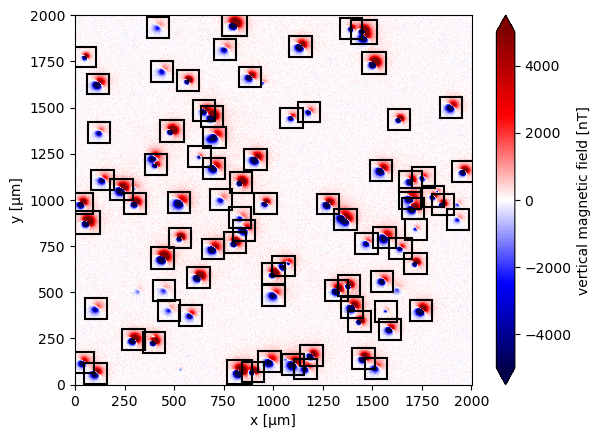

(1001,)

In [ ]:
import numpy as np
import verde as vd
import magali as mg
import harmonica as hm
import skimage.exposure
import xarray as xr
import matplotlib.pyplot as plt
from magali._utils import total_gradient_amplitude_grid

SEED = 5
rng = np.random.default_rng(SEED)

sensor_sample_distance = 5.0  # µm
region = [0, 2000, 0, 2000]  # µm
spacing = 2  # µm

true_inclination = 30  # degrees
true_declination = 40  # degrees
true_dispersion_angle = 5  # degrees
size = 100  # number of random dipoles

directions_inclination, directions_declination = mg.random_directions(
    true_inclination,
    true_declination,
    true_dispersion_angle,
    size=size,
    random_state= SEED,
)

dipoles_amplitude = abs(rng.normal(0, 100, size)) * 1.0e-14

dipole_coordinates = (
    rng.integers(30, 1970, size), # x
    rng.integers(30, 1970, size), # y
    rng.integers(-20, -1, size), # z
)

dipole_moments = hm.magnetic_angles_to_vec(
    inclination=directions_inclination,
    declination=directions_declination,
    intensity=dipoles_amplitude,
)

data = mg.dipole_bz_grid(
    region, spacing, sensor_sample_distance,
    dipole_coordinates, dipole_moments
)

noise_std_dev = 100  # nT
noise = rng.normal(loc=0, scale=noise_std_dev, size=data.shape)
data.values += noise

height_difference = 5 #µm

data_up = (
    hm.upward_continuation(data, height_difference)
    .assign_attrs(data.attrs)
    .assign_coords(x=data.x, y=data.y)
    .assign_coords(z=data.z + height_difference)
    .rename("bz")
)

dx, dy, dz, tga = mg.gradient(data_up)
data_up["dx"] = dx
data_up["dy"] = dy
data_up["dz"] = dz
data_up["tga"] = tga

stretched = skimage.exposure.rescale_intensity(
    tga,
    in_range=tuple(np.percentile(tga, (1, 99))),
)
data_tga_stretched = xr.DataArray(stretched, coords=data_up.coords)

windows = mg.detect_anomalies(
    data_tga_stretched,
    size_range = [20, 30], #µm
    detection_threshold = 0.05,
    border_exclusion= 2,
)

locations_ = []
dipole_moments_ = []
r2_ = []
for window in windows:
    anomaly = data_up.sel(x=slice(*window[:2]), y=slice(*window[2:]))
    dx, dy, dz, tga = mg.gradient(anomaly)
    table = vd.grid_to_table(anomaly)

    euler = hm.EulerDeconvolution(3)
    euler.fit(
        (table.x, table.y, table.z),
        (table.bz, table.dx, table.dy, table.dz)
    )

    bz_corrected = table.bz.values - euler.base_level_

    coordinates = (table.x.values, table.y.values, table.z.values)

    model_nl = mg.NonlinearMagneticDipoleBz(initial_location=euler.location_)
    model_nl.fit(coordinates, bz_corrected)
    locations_.append(model_nl.location_)
    dipole_moments_.append(model_nl.dipole_moment_)
    r2_.append(model_nl.r2_)

fig, ax = plt.subplots()
data.plot.pcolormesh(ax=ax, cmap="seismic", vmin=-5000, vmax=5000)
mg.plot_bounding_boxes(windows, ax=ax, color="black", linewidth=1.5)

plt.show()

In [2]:
r2_

[0.9999956440083662,
 0.9999780267435744,
 0.9999107805047814,
 0.9999978803880665,
 0.9999974852214424,
 0.9999198152969583,
 0.9999967384586738,
 0.9979223870730859,
 0.9873770217418432,
 0.9999635786868855,
 0.9861415568234988,
 0.989560580687562,
 0.9994773077139326,
 0.9966174314864147,
 0.9580700983879248,
 0.9967274150213906,
 0.9999854610314608,
 0.9485788691272625,
 0.9999636496818092,
 0.9999877313757565,
 0.9684771161962696,
 0.9998519122826907,
 0.8603217714485742,
 0.7612970014192838,
 0.9999924017839281,
 0.9806809873931822,
 0.9999914907387455,
 0.9975830124182536,
 0.9996741420642336,
 0.9652105089758318,
 0.9901629886593174,
 0.8190388418623699,
 0.7425857404000448,
 0.9208923058301473,
 0.9326738099828856,
 0.649326366389517,
 0.9995910163550474,
 0.9998480729904597,
 0.9985138634413404,
 0.9082946983673093,
 0.9331892272283108,
 0.9999841162698584,
 0.9999691608673629,
 0.9634060601708966,
 0.999749851396965,
 0.5999232061734545,
 0.9999817315914523,
 0.9998809714992